In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from sectorizedradialprofile.calculate_radial_profile import CalculateRadialProfile
# from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [2]:
%matplotlib notebook

Load the data

Visualize data

In [5]:
im = io.imread('BC_bottom_sm_crop_0050.tif')
print(im.shape)

(194, 192)


In [5]:
data_3d = np.array(im)

In [13]:
data_3d.shape

(521, 194, 192)

In [22]:
x, y, z = np.indices(data_3d.shape)

In [25]:
np.shape(data_3d)

(521, 194, 192)

In [27]:
y

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [191, 191, 191, ..., 191, 191, 191],
        [192, 192, 192, ..., 192, 192, 192],
        [193, 193, 193, ..., 193, 193, 193]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [191, 191, 191, ..., 191, 191, 191],
        [192, 192, 192, ..., 192, 192, 192],
        [193, 193, 193, ..., 193, 193, 193]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [191, 191, 191, ..., 191, 191, 191],
        [192, 192, 192, ..., 192, 192, 192],
        [193, 193, 193, ..., 193, 193, 193]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2

In [21]:
np.indices(data.shape)

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [191, 191, 191, ..., 191, 191, 191],
        [192, 192, 192, ..., 192, 192, 192],
        [193, 193, 193, ..., 193, 193, 193]],

       [[  0,   1,   2, ..., 189, 190, 191],
        [  0,   1,   2, ..., 189, 190, 191],
        [  0,   1,   2, ..., 189, 190, 191],
        ...,
        [  0,   1,   2, ..., 189, 190, 191],
        [  0,   1,   2, ..., 189, 190, 191],
        [  0,   1,   2, ..., 189, 190, 191]]])

In [12]:
data

array([[1.2766540e-07, 1.4478172e-07, 1.7346694e-07, ..., 3.4251923e-06,
        3.1237669e-06, 2.8214761e-06],
       [1.1085937e-07, 1.3089929e-07, 1.6272762e-07, ..., 3.4373277e-06,
        3.1713053e-06, 2.9024236e-06],
       [9.9182849e-08, 1.2162970e-07, 1.5586663e-07, ..., 3.4409334e-06,
        3.2061948e-06, 2.9716596e-06],
       ...,
       [2.9311991e-07, 2.5991315e-07, 2.3238249e-07, ..., 2.6600003e-06,
        2.8829572e-06, 3.0536210e-06],
       [2.4481045e-07, 2.2523025e-07, 2.1071938e-07, ..., 2.6359605e-06,
        2.8363786e-06, 2.9720877e-06],
       [2.0724765e-07, 2.0055114e-07, 1.9875786e-07, ..., 2.5889976e-06,
        2.7532951e-06, 2.8622542e-06]], dtype=float32)

<IPython.core.display.Javascript object>


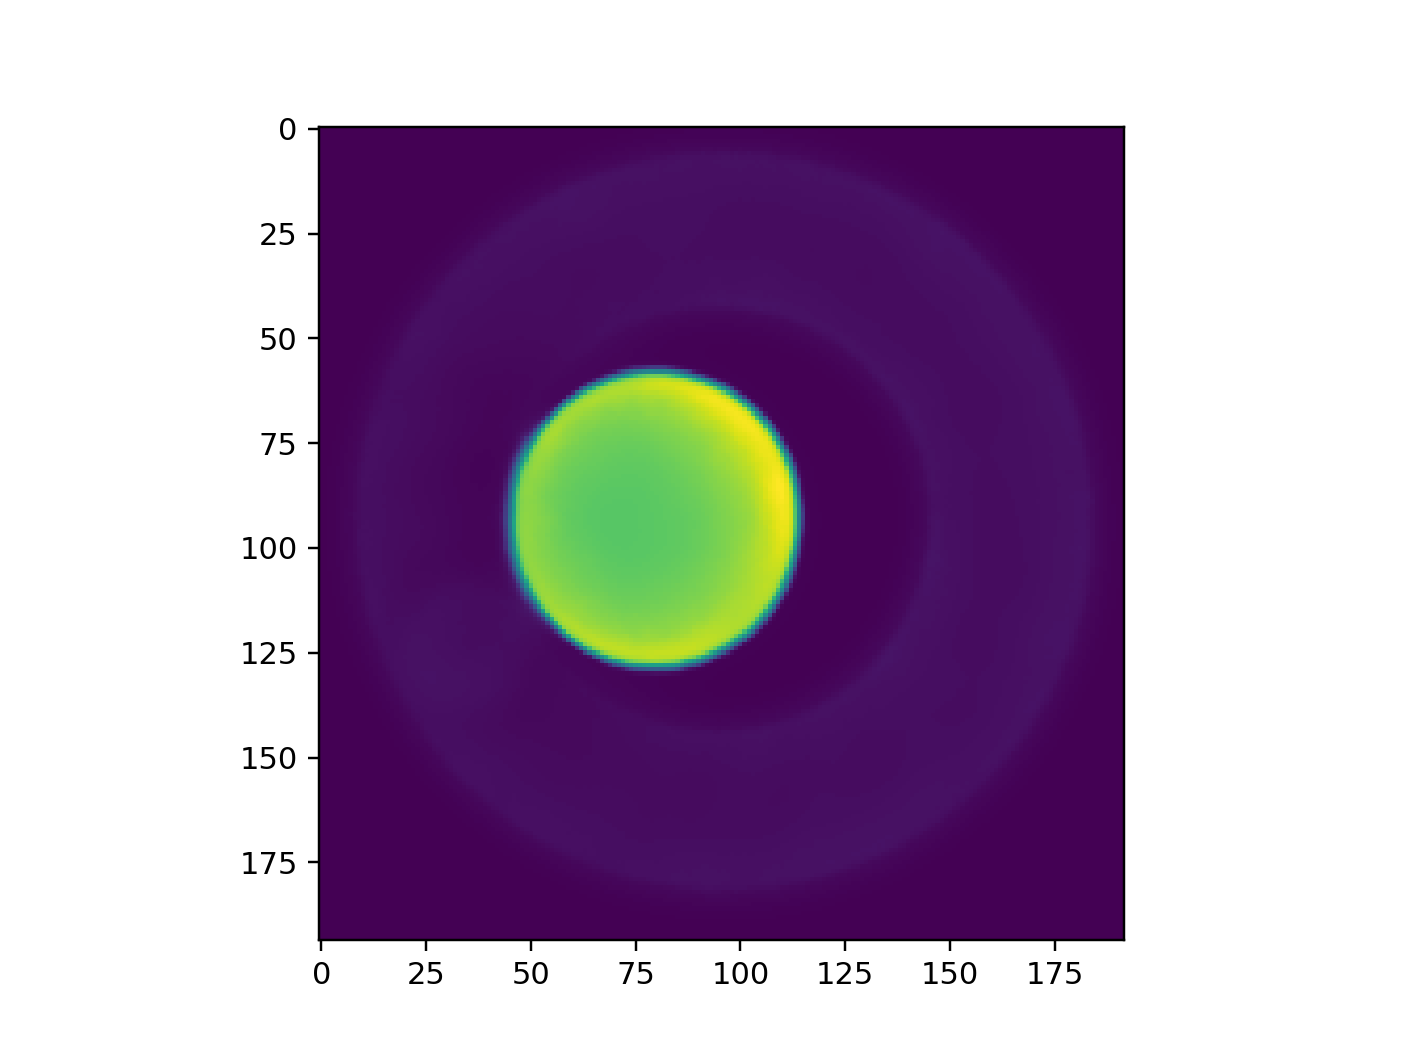

In [6]:
plt.imshow(im)

In [3]:
# data_file = 'data_2_circles.tif'
data_file = ['BC_bottom_crop_0050.tif', 'GC_top_crop_0549.tif']
# for each in data_file:
#     data = np.array(Image.open(each))
#     plt.figure(0)
#     plt.imshow(data)

In [4]:
BC_data = np.array(Image.open(data_file[0]))
GC_data = np.array(Image.open(data_file[1]))

<IPython.core.display.Javascript object>


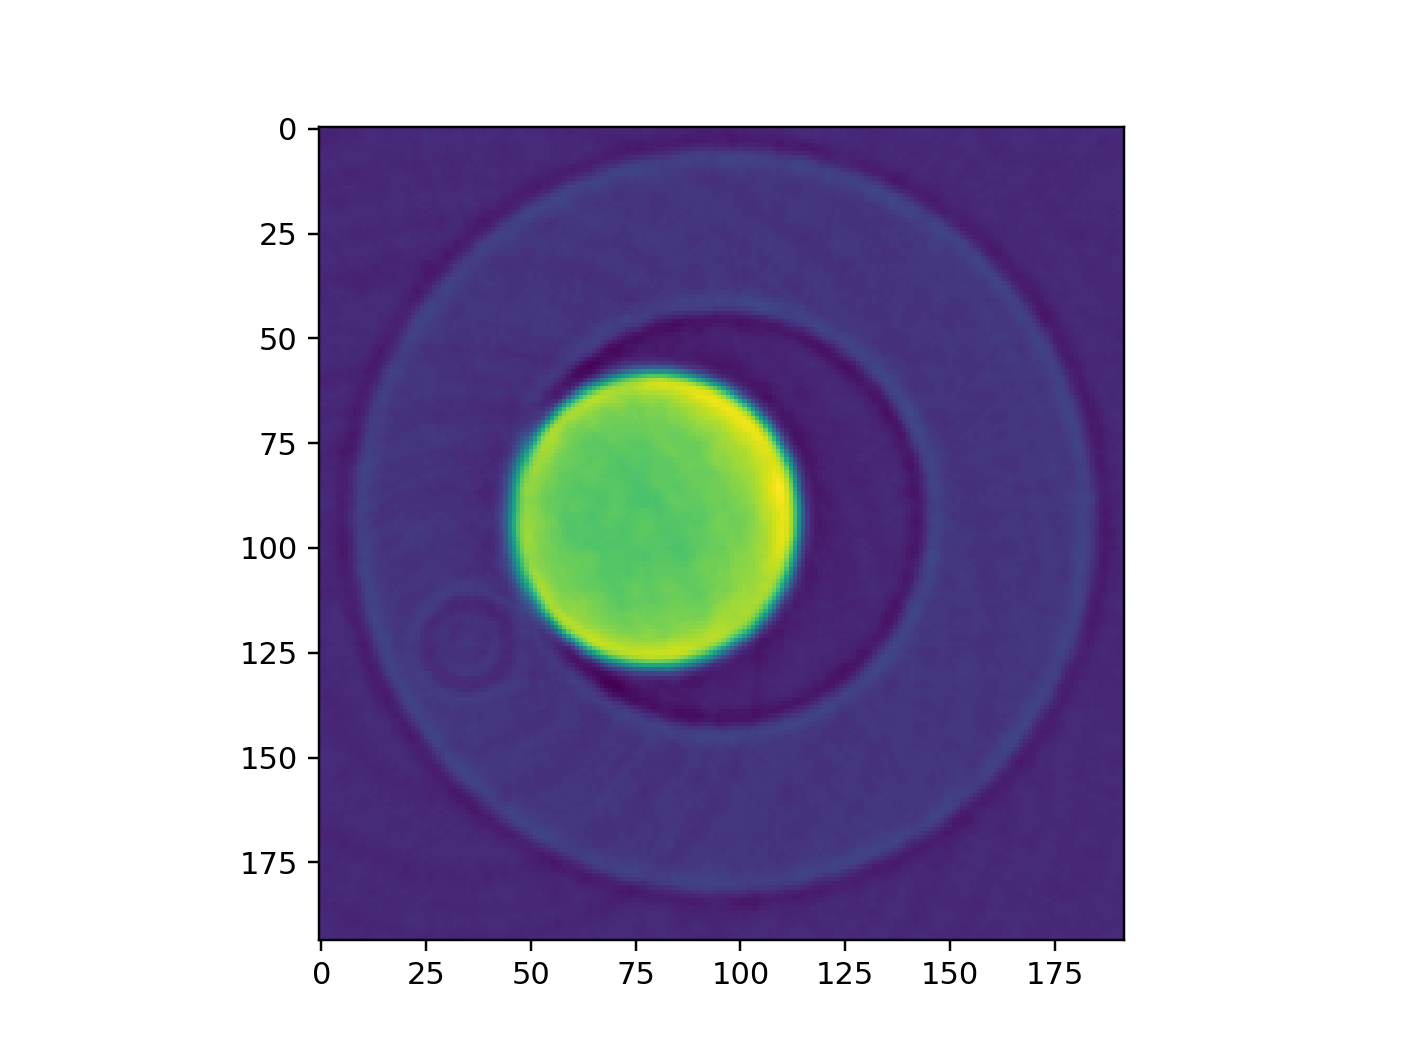

<IPython.core.display.Javascript object>


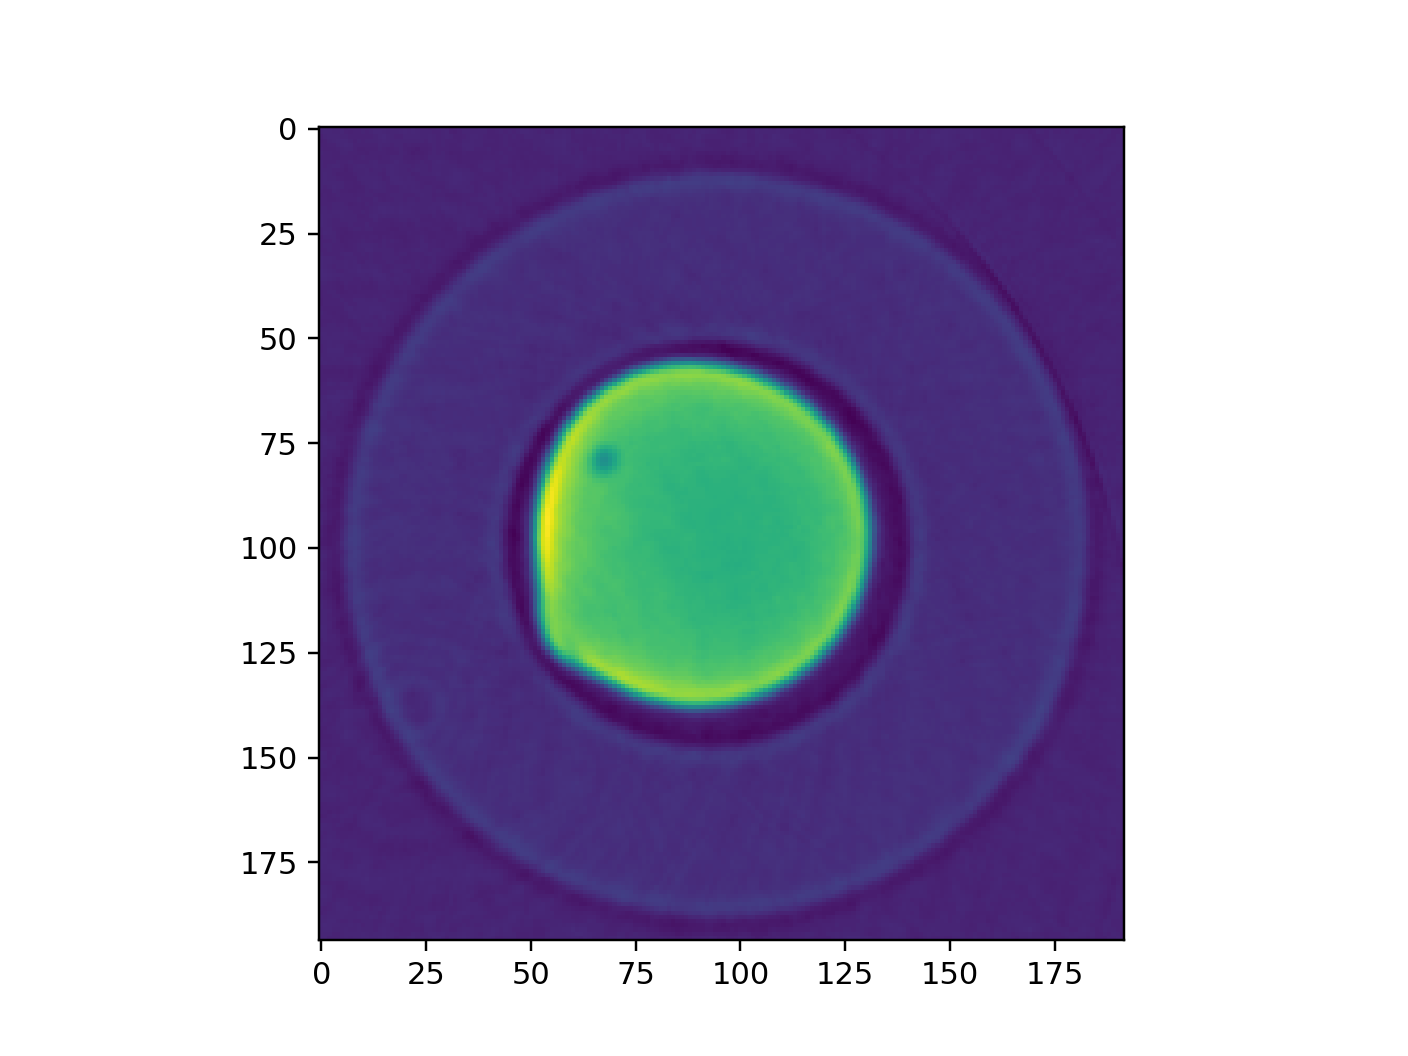

In [5]:
plt.figure(0)
plt.imshow(BC_data)
plt.figure(1)
plt.imshow(GC_data)

In [6]:
center = [{'x0': 79, 'y0': 93}, {'x0': 91, 'y0': 97}]
angle_range = {'from': 0, 'to': 360}
radius = 45
o_profile_BC = CalculateRadialProfile(data=BC_data, center=center[0], radius=radius, angle_range=angle_range)
o_profile_BC.calculate()
o_profile_GC = CalculateRadialProfile(data=GC_data, center=center[1], radius=radius, angle_range=angle_range)
o_profile_GC.calculate()

<IPython.core.display.Javascript object>


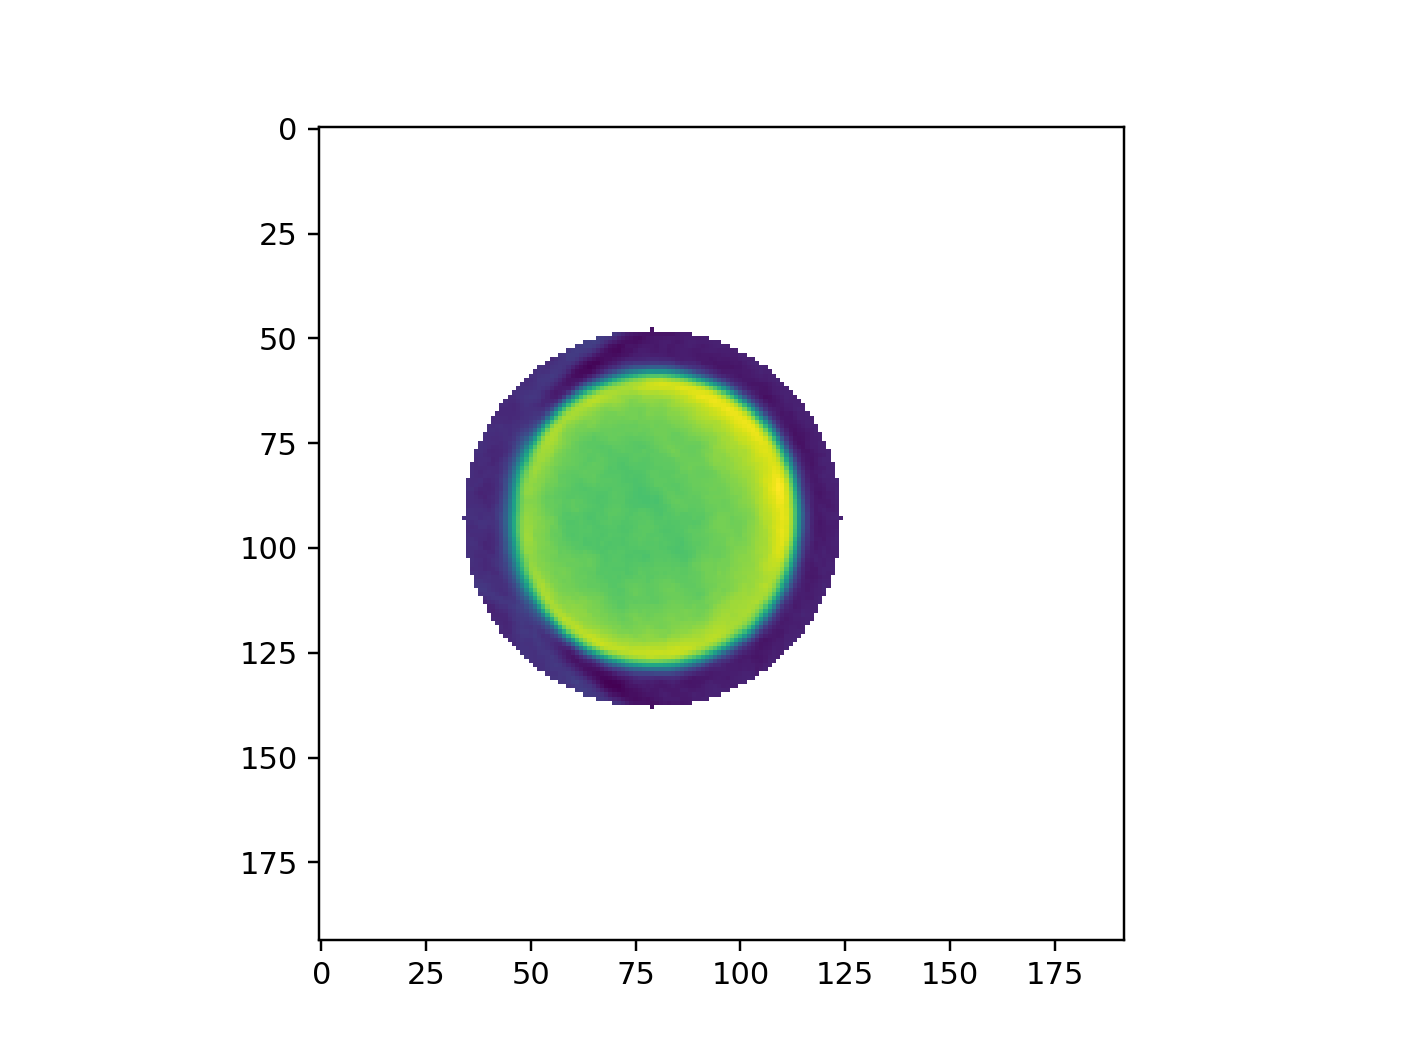

<IPython.core.display.Javascript object>


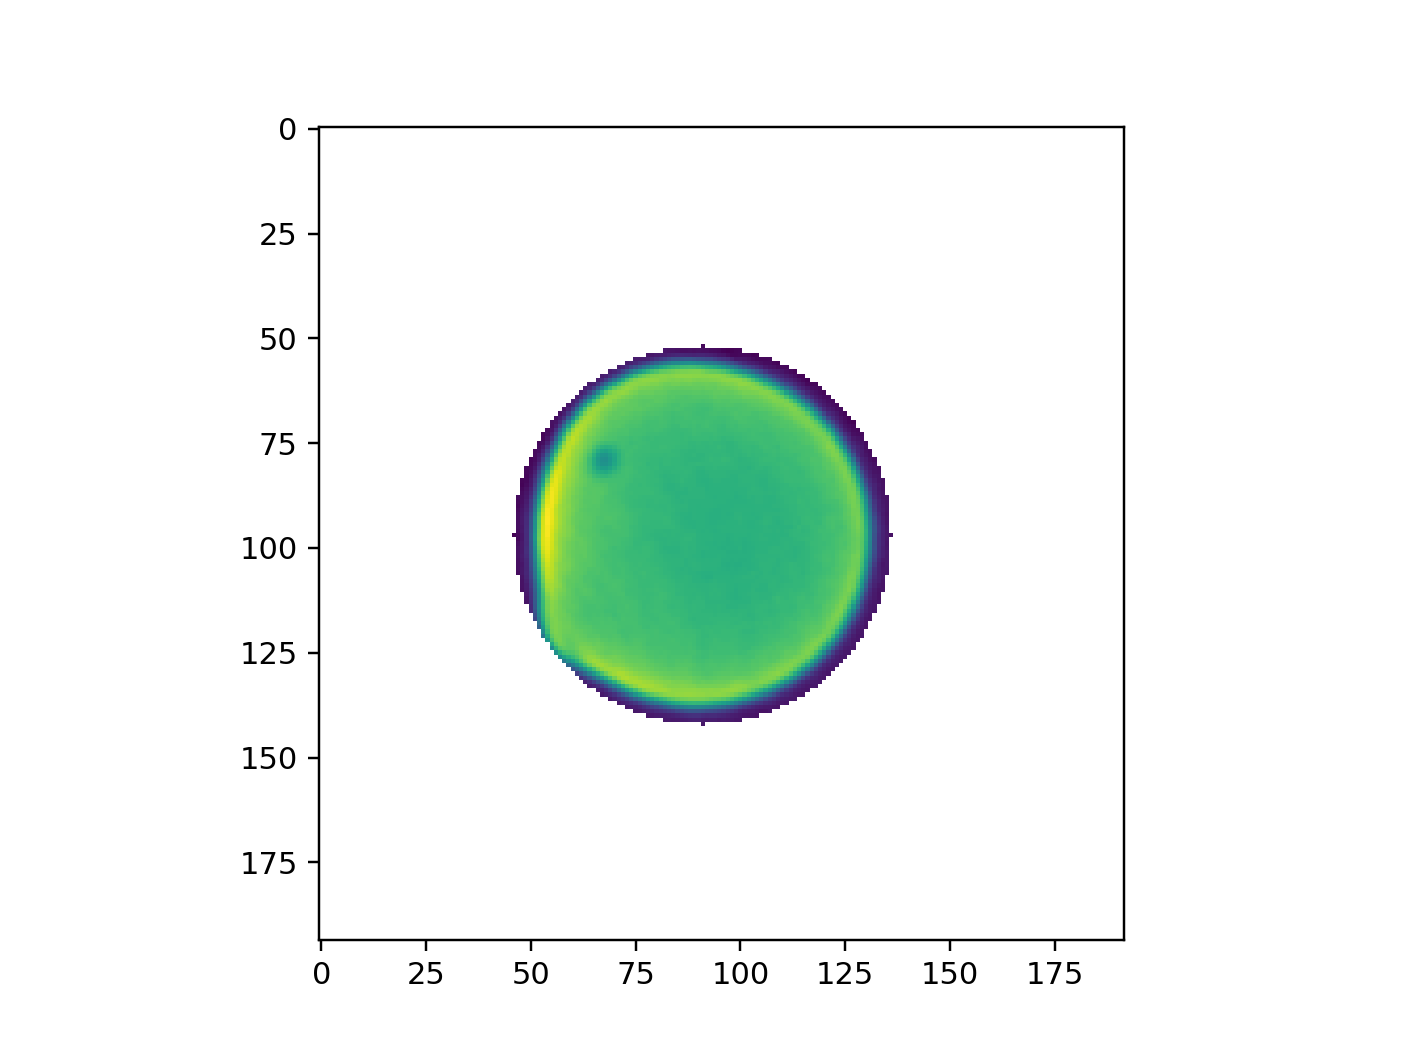

In [7]:
plt.figure(2)
plt.imshow(o_profile_BC.working_data)
plt.figure(3)
plt.imshow(o_profile_GC.working_data)

<IPython.core.display.Javascript object>


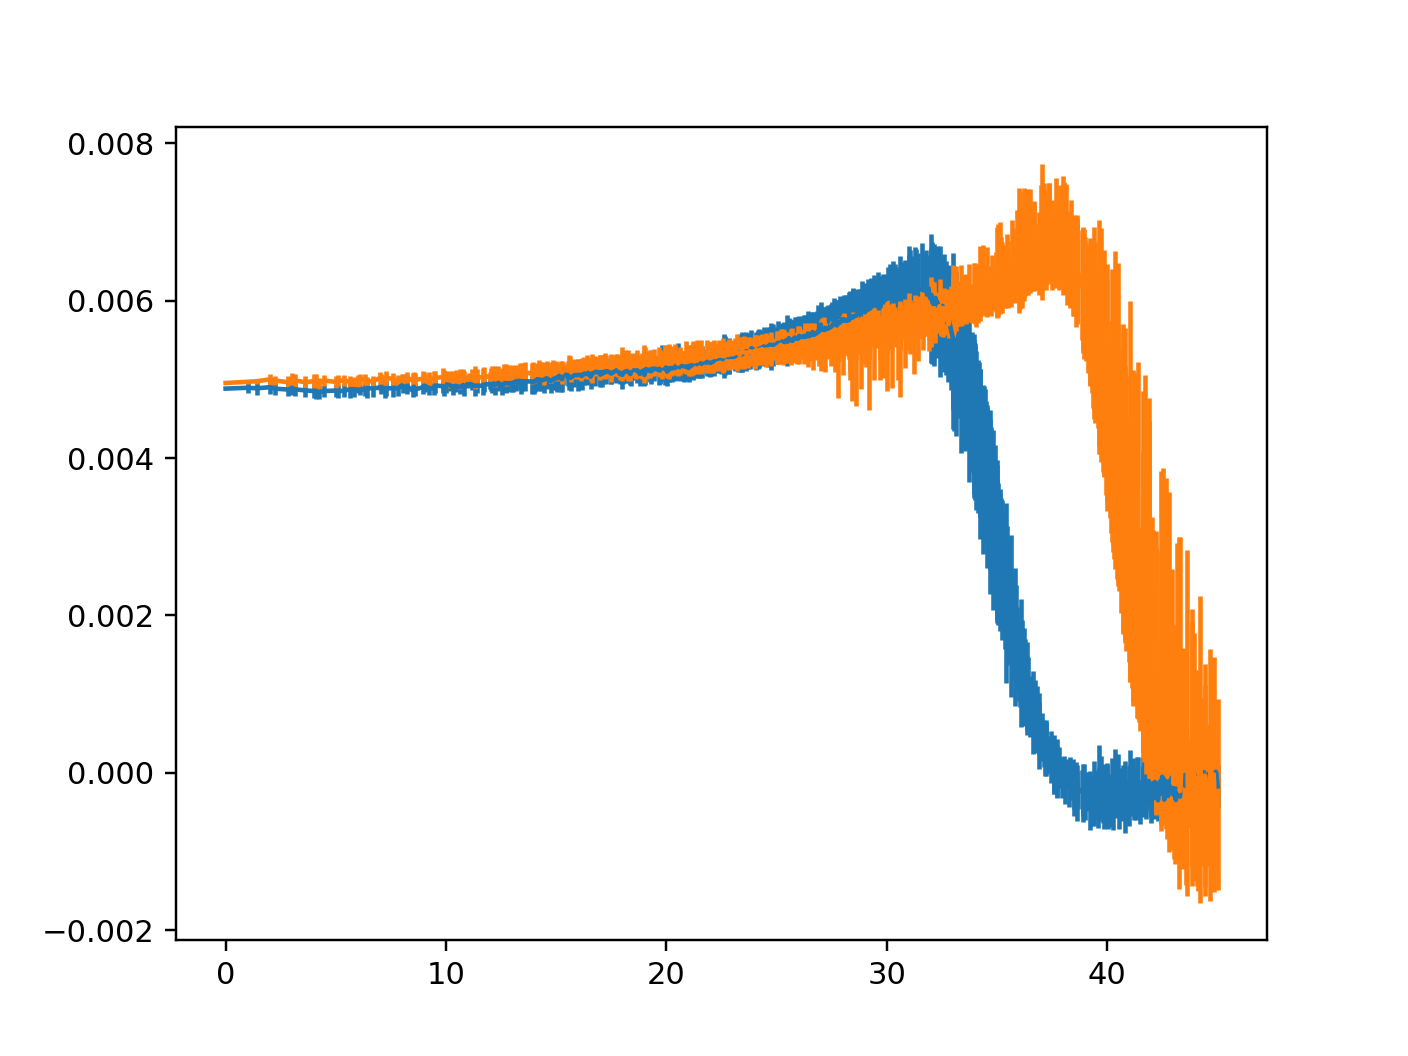

<ErrorbarContainer object of 3 artists>

In [8]:
bc = o_profile_BC.radial_profile
gc = o_profile_GC.radial_profile
plt.figure(4)
plt.errorbar(x=bc.index, y=bc['mean'], yerr=bc['std'])
plt.errorbar(x=gc.index, y=gc['mean'], yerr=gc['std'])

In [18]:
o_profile_BC.radial_profile.to_clipboard()

In [19]:
o_profile_GC.radial_profile.to_clipboard()